# Association Rule for Store Dataset

## Load Data

Load data dan tunjukan 5 row pertamanya

Dataset :
https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
url = "https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv"
df = pd.read_csv(url)
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


<h2> EDA

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
 7   orderid          38765 non-null  object
 8   OrderID          38765 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.7+ MB


In [158]:
df.isnull().any()

Member_number      False
Date               False
itemDescription    False
year               False
month              False
day                False
day_of_week        False
orderid            False
OrderID            False
dtype: bool

In [41]:
unique_list = []
for x in df['itemDescription'].unique():
    if x not in unique_list:
        unique_list.append(x)

unique_list

['tropical fruit',
 'whole milk',
 'pip fruit',
 'other vegetables',
 'rolls/buns',
 'pot plants',
 'citrus fruit',
 'beef',
 'frankfurter',
 'chicken',
 'butter',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'butter milk',
 'bottled water',
 'yogurt',
 'sausage',
 'brown bread',
 'hamburger meat',
 'root vegetables',
 'pork',
 'pastry',
 'canned beer',
 'berries',
 'coffee',
 'misc. beverages',
 'ham',
 'turkey',
 'curd cheese',
 'red/blush wine',
 'frozen potato products',
 'flour',
 'sugar',
 'frozen meals',
 'herbs',
 'soda',
 'detergent',
 'grapes',
 'processed cheese',
 'fish',
 'sparkling wine',
 'newspapers',
 'curd',
 'pasta',
 'popcorn',
 'finished products',
 'beverages',
 'bottled beer',
 'dessert',
 'dog food',
 'specialty chocolate',
 'condensed milk',
 'cleaner',
 'white wine',
 'meat',
 'ice cream',
 'hard cheese',
 'cream cheese ',
 'liquor',
 'pickled vegetables',
 'liquor (appetizer)',
 'UHT-milk',
 'candy',
 'onions',
 'ha

In [48]:
df2 = df.groupby(['year','month'])['day'].agg('count').reset_index().astype('str')
df2['period'] = df2[['year', 'month']].apply(lambda x: '-'.join(x), axis=1)
df2 = df2.astype({"day": int, "year": int, "month": int, "period": str})
df2

,year,month,day,period
0,2014,1,1504,2014-1
1,2014,2,1547,2014-2
2,2014,3,1491,2014-3
3,2014,4,1506,2014-4
4,2014,5,1625,2014-5
5,2014,6,1525,2014-6
6,2014,7,1623,2014-7
7,2014,8,1535,2014-8
8,2014,9,1350,2014-9
9,2014,10,1555,2014-10


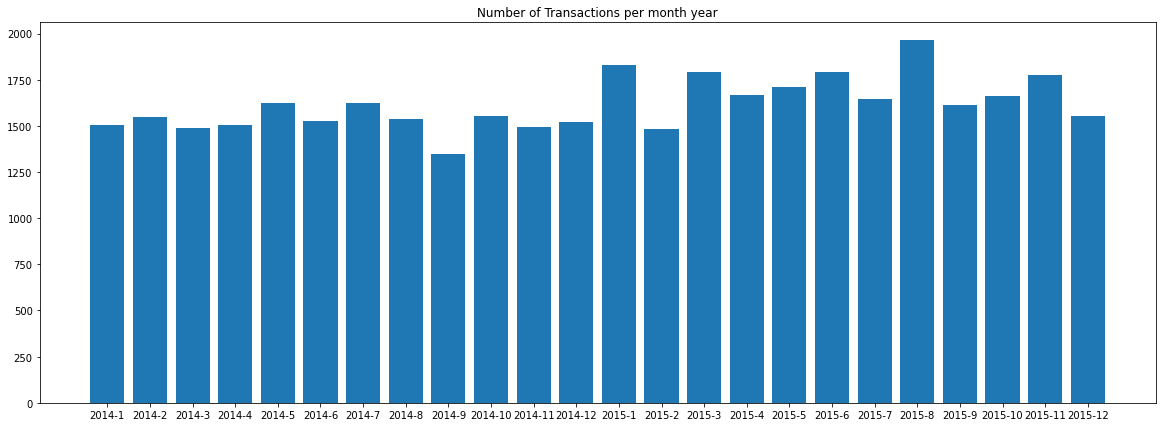

In [29]:
fig = plt.figure(figsize =(20, 7))
plt.bar(df2['period'], df2['day'])
plt.title("Number of Transactions per month year")
plt.show()

<h2> Data Preprocessing

Ubahlah dataset di atas menjadi bentuk one hot encoding. Asumsikanlah bahwa pembelian barang yang dilakukan oleh Customer ID yang sama dalam hari yang sama terjadi dalam 1 transaksi yang sama (satu Order ID)

contoh :
![image-2.png](attachment:image-2.png)

In [34]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [135]:
ds = pd.DataFrame(df)
ds['OrderID'] = ds['Member_number'].astype(str)+'_'+ds['Date'].astype(str)
ds = ds.groupby(['OrderID'])[['itemDescription']].apply(lambda x: list(np.unique(x)))

In [143]:
trans_encoding = TransactionEncoder()
dataset = trans_encoding.fit(ds).transform(ds)
dataset2 = pd.DataFrame(dataset, columns=trans_encoding.columns_)
dataset2['OrderID'] = df['Member_number'].astype(str)+'_'+df['Date'].astype(str)
dataset2 = dataset2.set_index(['OrderID'])

In [149]:
from sklearn import preprocessing

# create new dataframe from the encoded features
dataset3 = pd.DataFrame(dataset2, columns=trans_encoding.columns_)

le = preprocessing.LabelEncoder()
for item in unique_list:
  dataset3[item] = le.fit_transform(dataset3[item])


# show the new dataframe
dataset3.columns.name = 'itemDescription'
dataset3

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
OrderID,,,,,,,,,,,,,,,,,,,,,
1808_2015-07-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2552_2015-05-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2300_2015-09-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1187_2015-12-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3037_2015-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049_2014-02-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4663_2014-04-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3521_2014-10-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori Algorithm

Gunakanlah algroitma apriori untuk mencari tahu produk mana yang sering dibeli secara bersama-sama (min support = 0.01)

In [151]:
frequent_set = apriori(dataset3, min_support = 0.01, use_colnames = True)
frequent_set

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
65,0.014837,"(whole milk, other vegetables)"
66,0.013968,"(whole milk, rolls/buns)"
67,0.011629,"(whole milk, soda)"


Berdasarkan hasil di atas, buatlah association rules nya dengan syarat min confidence = 0.1 

In [156]:
rules = association_rules(frequent_set, metric = 'confidence', min_threshold = 0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
1,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
3,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
